# Занятие 5. HTTP, JSON и REST API

## Сети. Модель OSI

Передача информации по сети между клиентом (устройством, запращивающим услугу) и сервером (устройстов, предоставляющим услугу) - сложный многоуровневый процесс. Для его работы требовалось стандартизировать и ввести соответсвующие протоколы для всех уровней взаимодействия устройств – от побитовой передачи до клиент-серверного взаимодействия. 

Для описания этого процесса придумали эталонную модель взаимодействия открытых систем OSI (Open Systems Interconnection reference model).

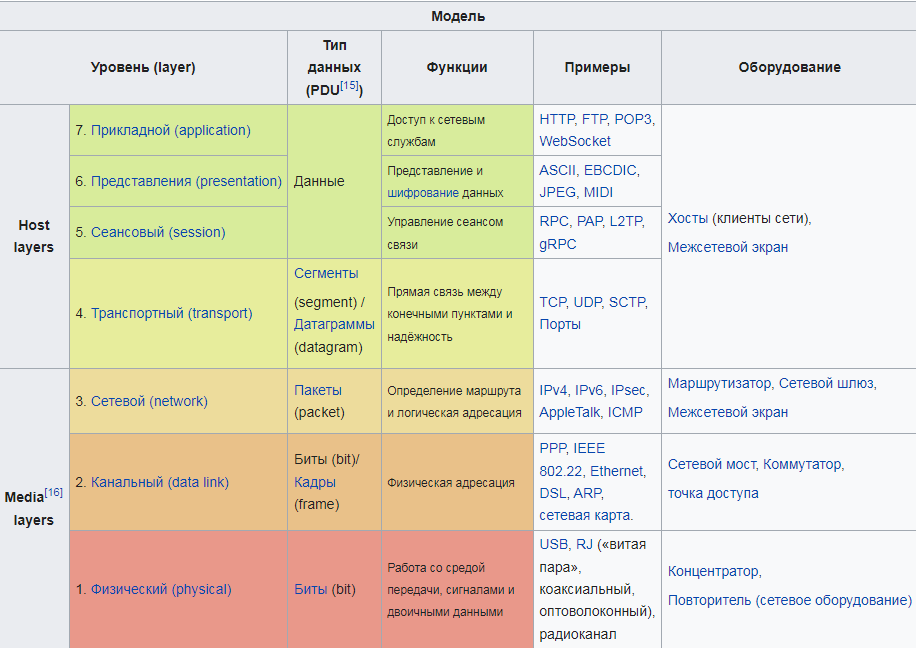

К счастью, для разработки не требуется экспертное знание всех представленных протоколов. 

### UDP vs TCP
UDP быстрее, чем TCP, потому что пользователю не нужно разрешать или подтверждать получение данных перед отправкой следующего пакета. Поэтому через протокол UDP и установка соединения, и передача данных происходит быстрее.

## HTTP

На прикладном уровне представлены 2 протокола, часто используемых протокола в Backend разработке: WebSocket и HTTP (HyperText Transfer Protocol, протокол передачи гипертекста). 

О последнем мы поговорим более подробно. 

Протокол HTTP работает по принципу «запрос — ответ». Он создавался для передачи гипертекстовых документов формата HTML (веб-страницы), однако в настоящее время используется для обмена произвольными данными: графическими и видеофайлами, документами и т. д. В протоколе описаны виды запросов, правила формирования запросов и возможные варианты ответов на запросы.
.

### HTTP Requests

Структура HTTP Request:
1. Method (GET, POST, PUT, ...)
2. URI
3. Version (HTTP/1.1)
4. HTTP-заголовки (Headers)
5. Тело сообщения (опционально)
   
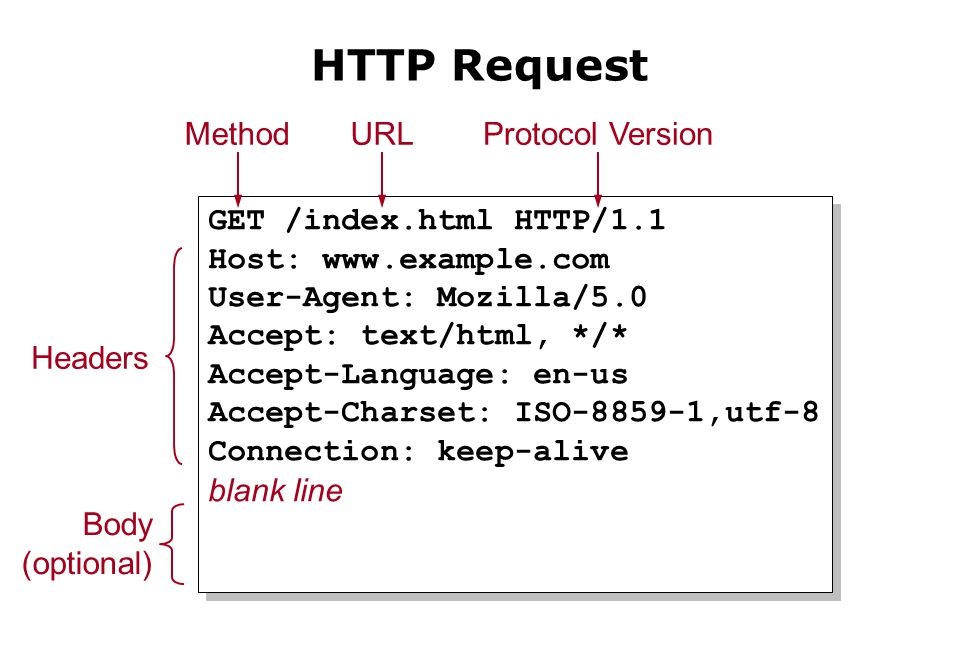

В протоколе HTTP описаны различные виды запросов (Requests): 
на получение данных (GET), на передачу данных (POST), на добавление и изменение данных (PUT), на удаление данных (DELETE) и др.

### HTTP Responce

![image](https://media.geeksforgeeks.org/wp-content/uploads/20210905094321/StructureOfAHTTPResponse-660x374.png)

Ответы (Responce в протоколе HTTP имеют коды состояния, которые представляют собой числовые значения. По коду состояния всегда можно определить, верно ли был обработан запрос или произошла ошибка.

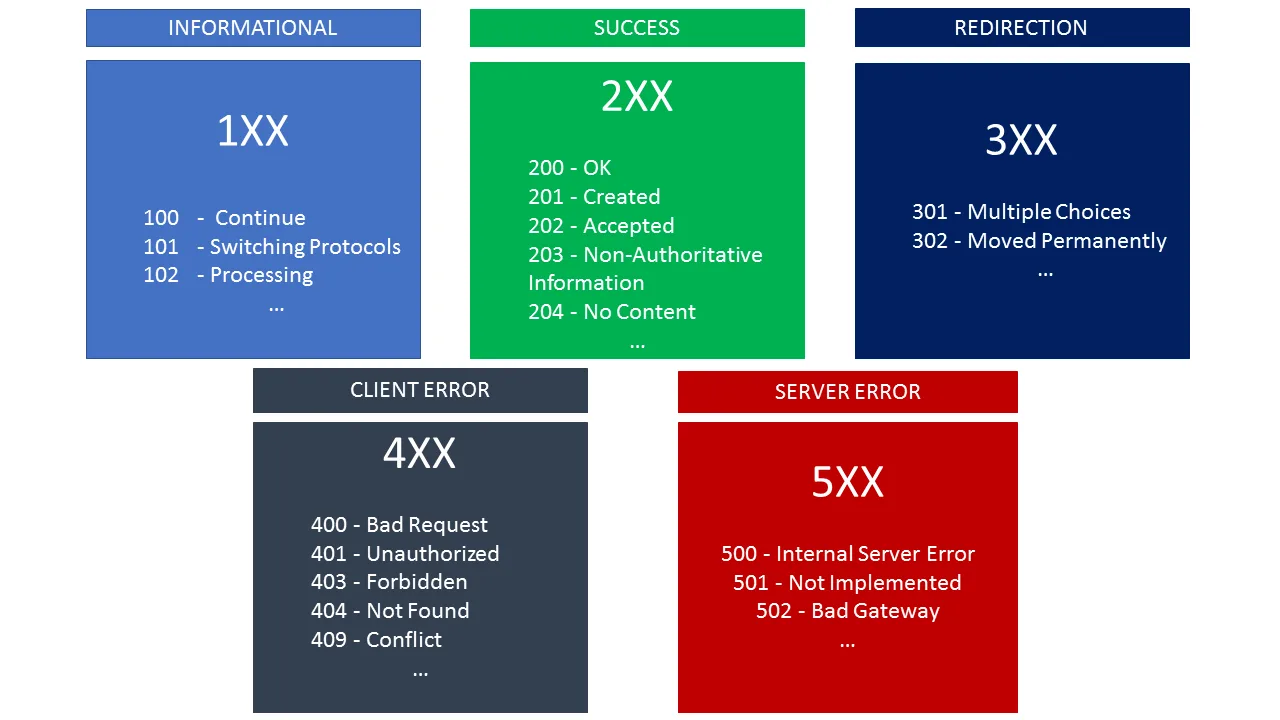

### Способы передачи данных

1. HTTP Query
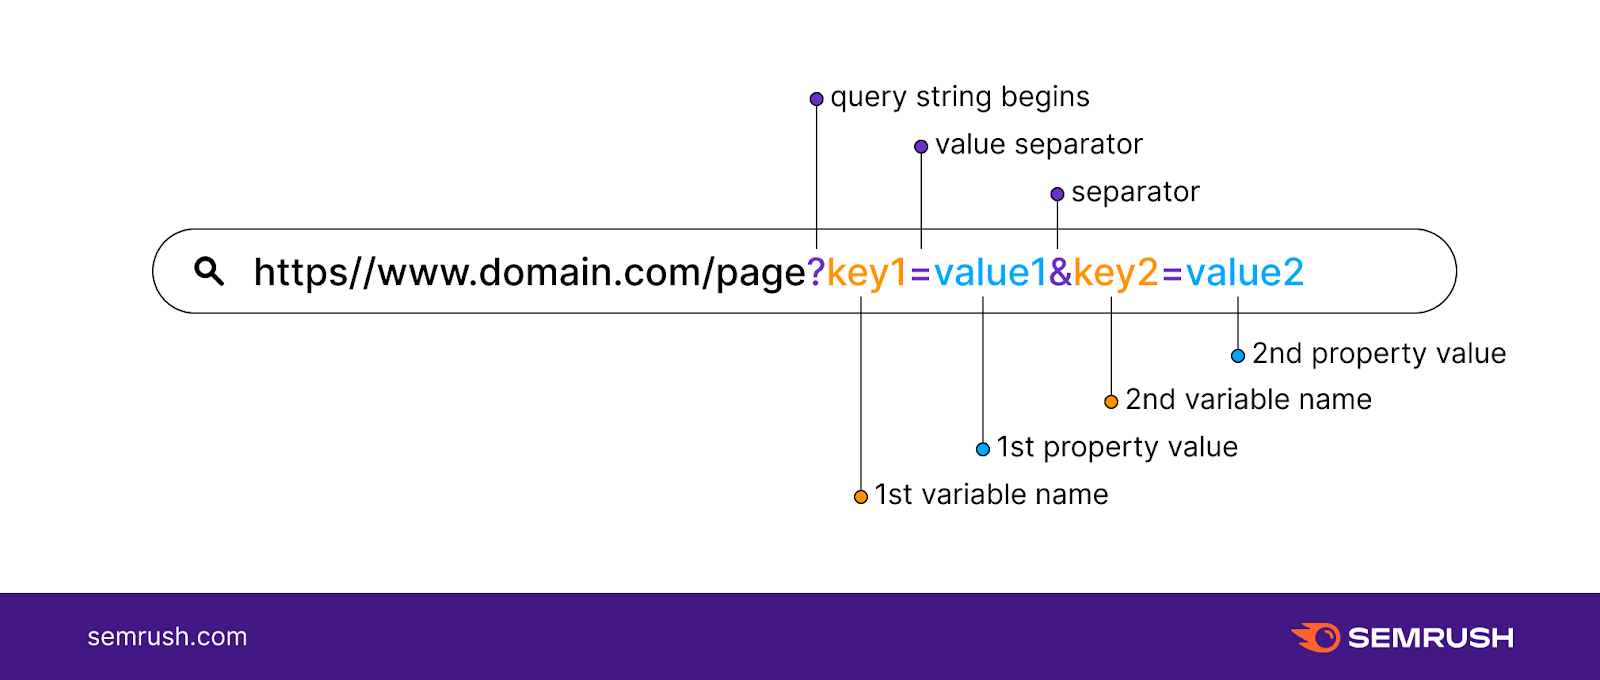
2. Path Param

In [1]:
# !pip install requests
import requests

r = requests.get("https://www.google.com/", params={"q": "Python за 5 секунд"})
r.request.url

'https://www.google.com/?q=Python+%D0%B7%D0%B0+5+%D1%81%D0%B5%D0%BA%D1%83%D0%BD%D0%B4'

In [2]:
r = requests.get("https://www.google.com/", params={"q": "Python за 5 секунд"}, headers={"accept": "application/json"})
r.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'accept': 'application/json', 'Connection': 'keep-alive'}

In [3]:
import requests

r = requests.get("https://www.google.com/")
for header in r.headers:
    print(f"{header}: {r.headers[header]}", end="\n\n")
print(r.status_code)

Date: Sun, 15 Oct 2023 19:09:37 GMT

Expires: -1

Cache-Control: private, max-age=0

Content-Type: text/html; charset=ISO-8859-1

Content-Security-Policy-Report-Only: object-src 'none';base-uri 'self';script-src 'nonce-vdgEMI7zHEEa7P6Kw-CYLw' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp

P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."

Content-Encoding: gzip

Server: gws

X-XSS-Protection: 0

X-Frame-Options: SAMEORIGIN

Set-Cookie: 1P_JAR=2023-10-15-19; expires=Tue, 14-Nov-2023 19:09:37 GMT; path=/; domain=.google.com; Secure, AEC=Ackid1TT1dfByybyjGyflCy4or1IIKmfzk9AqaLqcvEBRCd6O3qrcXZ1YWg; expires=Fri, 12-Apr-2024 19:09:37 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=cBmXDvuIAbq4LBPgTy5YH2xUDUnK18I7Nc5nN5M_Oc5w0D74DtynRunnmqIH1PRAyOxCkKRUuoxAaledLficKcREycgJiBVEiJpilnikNhNIANIdFNFmg88s7BCJDKwL1VI1gA-uU9PzuCz9rbE-PDA9C33Ero9av2-t8RhASlw; expires=Mon, 15

## JSON

JSON (JavaScript Object Notation) — стандартный текстовый формат для хранения и передачи структурированных данных. Он основан на синтаксисе объекта в JavaScript: данные представлены в виде пар ключ:значение (map) или набор значений (array)

Ключи - только строки.

Значения могут быть следующих типов:

Python|JSON
------|-----
dict|object
list, tuple|array
str|string
int, float|number
True|true
False|false
None|null

In [4]:
# чтение json из файла
import json

with open("example.json") as f:
    data = json.load(f)
data

{'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}

In [5]:
# чтение json из строки
import json

data = json.loads('["key1", 123, null]')
print(data)

['key1', 123, None]


In [6]:
# запись в файл
import json

to_json = {"key1": "value1", "key2": "value2", "key3": "value3"}
with open("output.json", "w") as f:
    f.write(json.dumps(to_json))

In [8]:
# запись в json строку
import json

data = json.dumps('["key1", 123, null]')
print(data)

"[\"key1\", 123, null]"


## REST API

REST (Representational State Transfer) - это архитектурный стиль, набор принципов проектирования взаимодействия компонентов веб приложения в сети

5 принципов REST:
+ Клиент-серверная архитектура
+ Stateless (сервер не хранит состояние между запросами, каждый запрос должен содержать всю информацию для его обработки)
+ Кэширование (кеширование ресурсов для быстродействия)
+ Единый стиль (соответствие семантики http метода смыслу запроса, единый URL для одинаковых сущностей, формат входных и выходных данных и др.)
+ Многоуровневая система (клиента не должно волновать внутреннее устройство сервера)

Семантики методов

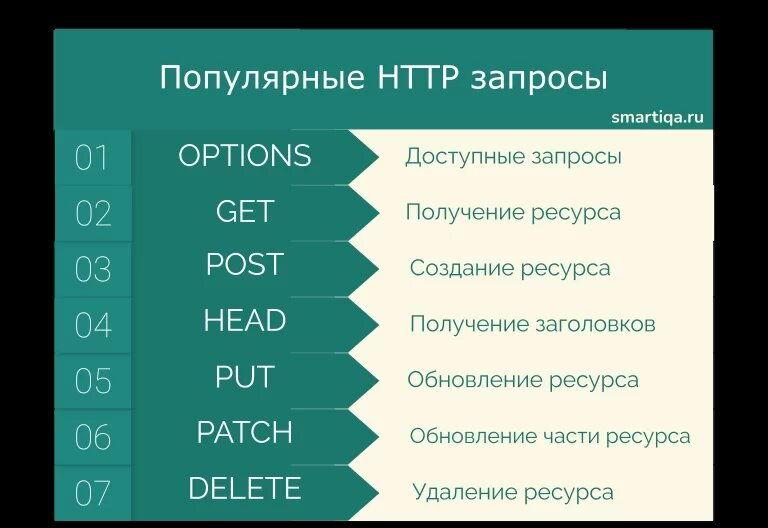

In [30]:
import requests

url = "https://test-fastapi-template-3880ff94f1d6.herokuapp.com/api/users"
user = requests.get(url + "/1")
user.json()

{'id': 1,
 'email': 'user@example.com',
 'role': 'USER',
 'hashed_password': '$2b$12$g5YIAQtRXYDefzHtLiqXo.eu1Za/wmyzcFkbfbm2.9HNjVhUkGqiK',
 'is_banned': False}

In [37]:
import requests

user_id = 1
url = f"https://test-fastapi-template-3880ff94f1d6.herokuapp.com/api/users/{user_id}"
user = requests.put(url, json={"email": "new_email@example.com", "password": "new_password"})
user.json()

{'id': 1,
 'email': 'new_email@example.com',
 'role': 'USER',
 'hashed_password': '$2b$12$.djoq9thhD42TSQfvgqIDuz5U1NgWVI0sjJoyDF8XcMZ02BILxQ7u',
 'is_banned': False}

In [38]:
import requests

user_id = 1
url = f"https://test-fastapi-template-3880ff94f1d6.herokuapp.com/api/users/{user_id}"
user = requests.delete(url)
user.json()

True

## Полезные материалы

1. [Не HTTP единым. Классное видео про клиент-серверную архитектуру и общее их взаимодействие](https://www.youtube.com/watch?v=XaTwnKLQi4A)
2. [Необходимая база для веб-разработчика](https://vladislaveremeev.gitbook.io/qa_bible/seti-i-okolo-nikh)
3. [Подробнее про HTTP](https://selectel.ru/blog/http-request/)
4. [Серия статей про HTTP от Avito.Tech](https://habr.com/ru/companies/avito/articles/710660/)
5. [Справка по модулю json в Python](https://pyneng.readthedocs.io/ru/latest/book/17_serialization/json.html)
6. [Про REST API от Яндекса](https://cloud.yandex.ru/docs/glossary/rest-api)
7. Курсы Г.С. Крынецкой в МИСИС - "Вычислительные машины и сети" и "Сетевые технологии"
   